<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/pivot-point-driven-pendulum-Ms091704/blob/main/Copy_of_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pseudocode of pivot point movement
1. import packages: `numpy as np`,`scipy.integrate` for `solve.ivp`, `matplotlib.pyplot as plt` for plotting, `matplotlib.animate` for animation
2. Equation of motion: define a function `pivot_driven_pendulum(t, y,omega_d, g=1, l=1, omega_0=1, gamma=0, X_p0=1, y_p0=1)` where `t` and `y` are the time and state variables, respectively; `omega_d` ia the driving frequency; `omega_0 = g/l =1` is the natural frequency; `gamma=0` is the damping coefficient; '[x_p0, y_p0]` are the maximum defflection values for the pivot point in x and y
  - the equation of motion is:
$$ \ddot{\theta}+2 \gamma \dot {\theta}+\omega_0^2sin\theta-\omega_d^2 \frac {y_{p_0}}{l}cos\omega_d t sin\theta + \omega_d^2 \frac {x_{p0}}{l}sin\omega_d t cos\theta=0$$
3. define utilities:
  - `get_pivot_xy(t, omega_d, x_p0, y_p0)` gives `x_p` and `y_p`, the position of the pivot point
  - `get_pendulum_xy(t, theta, l)` gives `x_pendulum` and `y_pendulum`, the postition of the pendulum bob referenced to the pivot point
  - `get_lab_xy(x_p, y_p, x_pendulum, y_pendulum)` gives `x_lab`, and `y_lab`, the postition of the pendulum bob in the lab-frame
  - `basic_plot(t,y,xlabel=none, ylabel=none, figsize=(3,3))` a basic formatted plot
4. solve equation of motion: use `solve.ivp` with `radua` method...
  - define initial `
5. Assign motion: Pivot point is going to start at the origin then begin to move in a circle (Periodic motion) where x(t)= -Lsin($omega$ t) and y(t)= Lcos($omega$ t - 1)
  - first dereivative is $x=x_p omega_d cos(omega_dt)$ and $y=-y_p omega sin(omega_d t)$
  - second derivative is ....
  - plug these values into the origianl equation
  - test
6. Initial conditions: *fixed parameters*: L, $omega_0$ *other parameters*: $omega_d$
  - Initial conditions: $omega_d$ close to zero so its larger than $omega_0$, $theta$ at t=0 is 0, and $theta$ dot at t=0 is 0,
  - reparametrize $x_p$, $y_p$
7. think about ending result: the angular frequency should be constant, but the angle is changing so it could be some linear fuction. $theta_f=Ct$ (maybe )


##Import modules

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Define the equation of motion
 -

In [24]:
import numpy as np

def pivot_driven_pendulum_ode(t, y, omega_d, g, l, omega_0, gamma, x_p0, y_p0):

  theta, theta_dot = y

  theta_ddot = -2 * gamma * theta_dot \
               - omega_0**2 * np.sin(theta) \
               + (omega_d**2 * y_p0 / l) * np.cos(omega_d * t) * np.sin(theta) \
               - (omega_d**2 * x_p0 / l) * np.sin(omega_d * t) * np.cos(theta)
  return [theta_dot, theta_ddot]

##Solve equation of motion

In [25]:
t_min = 0
t_max = 10 # Let's give it a duration to solve for
t_span = [t_min, t_max]
t_plot = np.linspace(t_min, t_max, 1000)

#parameters
g = l = 1
omega_0 = g/l # As per pseudocode, omega_0 = g/l = 1
gamma = 0.1
omega_d = 10
theta_0 = 0
ang_vel_0 = 0
x_p0 = 0
y_p0 = 0

y_0 = [theta_0, ang_vel_0]

sol=solve_ivp(pivot_driven_pendulum_ode, t_span, y_0, args=(omega_d, g, l, omega_0, gamma, x_p0, y_p0), method = 'Radau', dense_output=True,)

##Plot

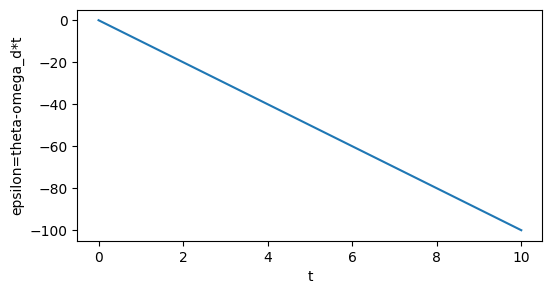

In [26]:
#construct plot
# Extract theta values from the solution
theta_plot = sol.sol(t_plot)[0]

plt.figure(figsize=(6,3))
plt.plot(t_plot, theta_plot-omega_d*t_plot)
plt.xlabel('t')
plt.ylabel('epsilon=theta-omega_d*t')
plt.show()

In [27]:
def get_pivot_xy(t_plot, omega_d, x_p0, y_p0):
  x_pivot = x_p0 -l * np.sin(omega_d * t_plot)
  y_pivot = y_p0 +l * np.cos(omega_d * t_plot) -l
  return [x_pivot, y_pivot]

def get_pendulum_xy(t, theta, l):
  x_pendulum = l * np.sin(theta_plot)
  y_pendulum = -l * np.cos(theta_plot)
  return [x_pendulum, y_pendulum]

def get_lab_xy(x_p, y_p, x_pendulum, y_pendulum):
  x_lab = x_pivot + x_pendulum
  y_lab = y_pivot + y_pendulum
  return [x_lab, y_lab]

##animation

In [28]:
# create pendulum animation
def create_pendulum_animation(t, x_pivot, y_pivot, x_lab, y_lab, l=1, show_traj=False, speed_factor=1.0):
    """
    Creates an animation of the pivot-driven pendulum.

    PARAMETERS:
    t : ndarray
        Time array.
    x_pivot : ndarray
        x-positions of the pivot over time.
    y_pivot : ndarray
        y-positions of the pivot over time.
    x_lab : ndarray
        x-positions of the pendulum bob in the lab frame over time.
    y_lab : ndarray
        y-positions of the pendulum bob in the lab frame over time.
    l : float, optional
        pendulum length (default is 1).
    show_traj : bool, optional
        toggle showing the trajectory of the pendulum bob (default is False).
    speed_factor : float, optional
        factor to scale the animation speed (default is 1.0).
        a value > 1.0 slows down the animation, < 1.0 speeds it up.

    RETURNS:
    anim : FuncAnimation
        matplotlib animation object.
    """
    fig, ax = plt.subplots(figsize=(4, 4)) # Increased figure size
    ax.set_xlim(np.min(x_pivot) - l, np.max(x_pivot) + l)
    ax.set_ylim(np.min(y_pivot) - l, np.max(y_pivot) + l)
    # ax.set_aspect('equal', adjustable='box')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Initialize plot elements
    pivot, = ax.plot([], [], 'o', color='black', markersize=8, label='Pivot')
    pendulum_arm, = ax.plot([], [], '-', color='black', lw=2, label='Pendulum Arm')
    pendulum_bob, = ax.plot([], [], 'o', color='red', markersize=12, label='Pendulum Bob')
    trajectory = None # Initialize trajectory to None

    if show_traj:
        trajectory, = ax.plot([], [], '-', color='gray', lw=1, alpha=0.5, label='Trajectory') # Add trajectory line

    def animate(i):
        # Update the positions of the plot elements
        pivot.set_data([x_pivot[i]], [y_pivot[i]]) # Pass as sequences
        pendulum_arm.set_data([x_pivot[i], x_lab[i]], [y_pivot[i], y_lab[i]])
        pendulum_bob.set_data([x_lab[i]], [y_lab[i]]) # Pass as sequences

        artists = [pivot, pendulum_arm, pendulum_bob] # List of artists to update

        if show_traj and trajectory:
             trajectory.set_data(x_lab[:i+1], y_lab[:i+1]) # Update trajectory data
             artists.append(trajectory) # Add trajectory to the list of artists

        return artists # Return all updated artists

    # Create the animation
    # Adjust the interval based on the average time step in t
    # This aims to make the animation speed consistent with the simulation time
    average_time_step = np.mean(np.diff(t))
    # Scale the interval by the speed_factor
    interval = average_time_step * 1000 * speed_factor # Convert to milliseconds and apply speed_factor.

    anim = FuncAnimation(fig, animate, frames=len(t), interval=interval, blit=True)
    plt.close(fig) # Close the initial figure to prevent it from displaying

    return anim

In [29]:
# animate motion
# plot pendulum angle versus time
# get coordinates for plotting
n_points = 300 # number of frames
t_plot = np.linspace(t_min, t_max, n_points)
theta_plot = sol.sol(t_plot)[0] # requires `dense_output=True` in `solve_ivp`
x_pivot, y_pivot = get_pivot_xy(t_plot, omega_d, x_p0, y_p0) # pivot coordinates
x_pendulum, y_pendulum = get_pendulum_xy(t_plot, theta_plot, l) # pendulum coordinates of pendulum (referenced to pivot point)
x_lab, y_lab = get_lab_xy(x_pivot, y_pivot, x_pendulum, y_pendulum) # pendulum coordinates in the lab frame

# animation flags/parameters
show_traj = True # True --> show trajectory; False --> do not show trajectory
speed_factor = .6 # >1 --> slow down animation; <1 --> speed up animation

# create_pendulum_animation
pendulum_animation = create_pendulum_animation(t_plot, x_pivot, y_pivot, x_lab, y_lab, show_traj=show_traj, speed_factor=speed_factor) # create animation object with trajectory shown
HTML(pendulum_animation.to_html5_video()) # display animation